In [40]:
import pandas as pd
from tqdm import tqdm_notebook

prefix = 'data/'

In [42]:
#load train data
train_df = pd.read_csv('data/train.csv', header=None)
train_df.columns = ['label', 'text']
train_df = train_df[['text', 'label']]
train_df['text'] = train_df['text'].astype(str)
train_df['label'] = train_df['label'].astype(int)

In [44]:
#load test data
eval_df = pd.read_csv('data/test.csv', header=None)
eval_df.columns = ['label', 'text']
eval_df = eval_df[['text', 'label']]
eval_df['text'] = eval_df['text'].astype(str)
eval_df['label'] = eval_df['label'].astype(int)

In [50]:
from simpletransformers.classification import ClassificationModel
import pandas as pd


# Train and Evaluation data needs to be in a Pandas Dataframe containing at least two columns. If the Dataframe has a header, it should contain a 'text' and a 'labels' column. If no header is present, the Dataframe should contain at least two columns, with the first column is the text with type str, and the second column in the label with type int.
train_data = train_df

train_df.head()



#print(type(train_df[1][0]))
eval_data = test_df



#eval_df = pd.DataFrame(eval_data)




In [51]:
# Create a ClassificationModel
model = ClassificationModel('bert', 'bert-base-cased',use_cuda=False, num_labels=10, args={'reprocess_input_data': True, 'overwrite_output_dir': True}) 
# You can set class weights by using the optional weight argument

In [52]:


# Train the model
model.train_model(train_df,output_dir='output2/')

Converting to features started.


Running loss: 0.798994

Training of bert model complete. Saved to output2/.


In [54]:


# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

Converting to features started.


In [80]:
print(result)
#print(model_outputs)
print(len(wrong_predictions))


{'mcc': 0.6956421985703264, 'eval_loss': 0.6371818005174233}
787


In [66]:

predictions, raw_outputs = model.predict(eval_df['text'])

Converting to features started.


In [73]:
print(type(raw_outputs))

<class 'numpy.ndarray'>


In [75]:
#from tempfile import TemporaryFile
import numpy as np
np.save("data/savenp_preds.npy",predictions)
np.save("data/savenp_raw.npy",predictions)

In [76]:
preds = np.load("data/savenp.npy")

In [77]:
print(preds)

[5 3 3 ... 0 6 2]


In [105]:
result = {}
percent = np.zeros(shape=(10))
print("pred shape:",preds.shape[0]," preds:",preds.shape)
print("overall accuracy:",np.sum(eval_df['label']==preds)/preds.shape[0])
for i in range(0,10):
    result[i] = np.where(eval_df['label'] == i)
    print("correct prediction:",np.sum(preds[result[i]]==i)," total examples:",len(preds[result[i]]))
    print((np.sum(preds[result[i]]==i)*100)/len(preds[result[i]]))
    percent[i] =(np.sum(preds[result[i]]==i)*100)/len(preds[result[i]])

pred shape: 2896  preds: (2896,)
overall accuracy: 0.7282458563535912
correct prediction: 152  total examples: 341
44.57478005865103
correct prediction: 266  total examples: 314
84.71337579617834
correct prediction: 100  total examples: 153
65.359477124183
correct prediction: 332  total examples: 366
90.7103825136612
correct prediction: 297  total examples: 360
82.5
correct prediction: 302  total examples: 367
82.28882833787466
correct prediction: 279  total examples: 363
76.85950413223141
correct prediction: 75  total examples: 98
76.53061224489795
correct prediction: 69  total examples: 192
35.9375
correct prediction: 237  total examples: 342
69.29824561403508


In [101]:
years = ["1930s","1940s","1950s","1960s","1970s","1970s","1980s","1990s","2000s","2010s"]
p_list = percent.tolist()

In [92]:
!pip install matplotlib


     |████████████████████████████████| 13.1MB 1.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 71kB 4.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 4.9MB/s eta 0:00:01


<Figure size 640x480 with 1 Axes>

No handles with labels found to put in legend.


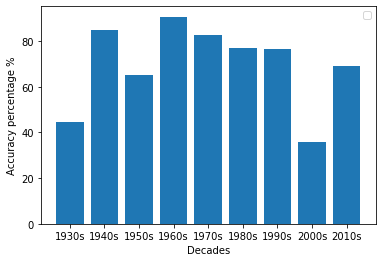

In [103]:
import matplotlib.pyplot as plt
plt.bar(years, p_list)
plt.legend()
plt.xlabel("Decades")
plt.ylabel("Accuracy percentage %")
plt.show()